#IS 470 #2

---

## Customer Purchase Prediction
<br>
Banks can generate significant profits from term deposits such as a certificate of deposit (CD). These deposits are required to be held for a certain period of time, which gives the bank access to those funds for lending purposes at a higher rate than the rate paid for the deposit. Of course, marketing term deposit products to customers can be expensive, so the bank will want to focus their efforts on those customers most likely to buy these products.<br>
<br>
In this data set, we have information about 45,211 customers, including demographic information as well as data related to their prior experience with the bank and previous marketing campaigns.Additionally, we have a class variable "y" that indicates whether this customer purchased a term product in the most recent marketing campaign.  Our objective is to predict which customers will purchase a term product if we spend the money to advertise to them.  We want to develop a model that will maximize the returns based on the costs of marketing and the benefits of customer purchase. <br>
<br>
This data was from a paper published by Moro et al. (S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014)
<br><br>
VARIABLE DESCRIPTIONS:<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") <br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) <br>
4 - education (categorical: "unknown","secondary","primary","tertiary") <br>
5 - default: has credit in default? (categorical: "yes","no") <br>
6 - balance: average yearly balance, in euros (numeric) <br>
7 - housing: has housing loan? (categorical: "yes","no") <br>
8 - loan: has personal loan? (categorical: "yes","no") <br>
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - day: last contact day of the month (numeric) <br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") <br>
12 - duration: last contact duration, in seconds (numeric) <br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") <br>

<br>
TARGET VARIABLE - y: has the client subscribed a term deposit? (binary: "yes","no")
<br>
The target variable is y.  All other columns are potential predictors.

## 1.Upload and clean data (5 points)

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank.csv to bank.csv
User uploaded file "bank.csv" with length 3751304 bytes


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
bank = pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Examine the number of rows and cols (1 point)
bank.shape

(45211, 17)

In [ ]:
# Show the head rows of a data frame (1 point)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Examine missing values (1 point)
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Examine variable type
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Change categorical variables to "category"
bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['default'] = bank['default'].astype('category')
bank['housing'] = bank['housing'].astype('category')
bank['loan'] = bank['loan'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['month'] = bank['month'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')
bank['y'] = bank['y'].astype('category')

In [ ]:
# Examine variable type again
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [ ]:
# Display all numeric variables (1 point)
bank.select_dtypes(include=['number'])

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [ ]:
# Display all categorical variables (1 point)
bank.select_dtypes(include=['category'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


## 2.Data exploration (10 points)

Text(0.5, 1.0, 'Countplot of Target Variable in the bank data set')

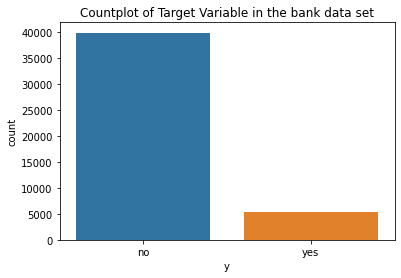

In [ ]:
# Show countplot of target variable (1 point)
snsplot = sns.countplot(x='y', data=bank)
snsplot.set_title("Countplot of Target Variable in the bank data set")

Text(0.5, 1.0, 'Countplot of housing in the bank data set')

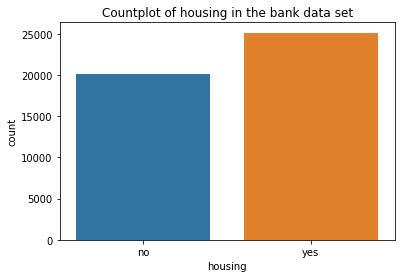

In [ ]:
# Show countplot of housing variable (1 point)
snsplot = sns.countplot(x='housing', data=bank)
snsplot.set_title("Countplot of housing in the bank data set")

In [ ]:
# For housing variable, show the number of instances (count) in each category (1 point)
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Q1. How many customers have housing loans? (1 point)<br>
25130 customers have housing loans


In [ ]:
# For job variable, show the number of instances (count) in each category (1 point)
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Q2. How many customers are retired? (1 point)<br>
2264 customers are retired


Text(0.5, 1.0, 'Histogram of duration in the bank data set')

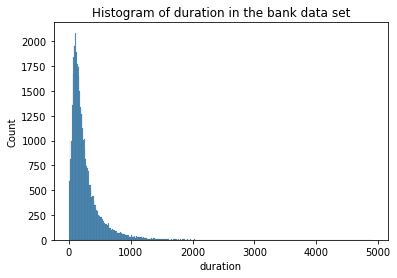

In [ ]:
# Show histogram of duration variable (1 point)
snsplot = sns.histplot(x='duration', data = bank)
snsplot.set_title("Histogram of duration in the bank data set")

Q3. Is the distribution skewed? (1 point)<br>
Yes, the distribution is skewed. It is right skewed (positive skewness).

In [ ]:
# Display correlations for all numeric variables. (1 point)
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Text(0.5, 1.0, 'Boxplot of duration based on y type')

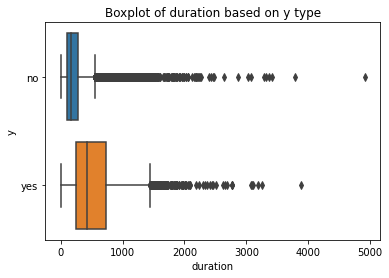

In [ ]:
# Show a boxplot of duration based on the value of y variable (y = yes or no). (1 point)
snsplot = sns.boxplot(x='duration', y= 'y', data = bank)
snsplot.set_title("Boxplot of duration based on y type")

## 3.Data partitioning and inspection code (8 points)

In [ ]:
# Select all the categorical variables (we will use only categorical variables to make predictions)
bank = bank.select_dtypes(include=['category'])
bank

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [ ]:
# Create dummy variables for all categorical variables, except the target variable	(3 points)
bank = pd.get_dummies(bank, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'], drop_first=True)
bank

,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (3 points)
target = bank['y']
predictors = bank.drop(['y'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(31647, 35) (13564, 35) (31647,) (13564,)


In [ ]:
# Examine the proportion of target variable for training data set (1 point)
print(target_train.value_counts(normalize=True))

no     0.883275
yes    0.116725
Name: y, dtype: float64


In [ ]:
# Examine the proportion of target variable for testing data set (1 point)
print(target_test.value_counts(normalize=True))

no     0.882409
yes    0.117591
Name: y, dtype: float64


## 4.Simple decision tree training and testing. (11 points)

In [ ]:
# Build a decision tree model on training data. Set criterion = "entropy", random_state = 1, max_depth = 3 (3 points)
model = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(837.0, 951.3000000000001, 'poutcome_success <= 0.5\nentropy = 0.52\nsamples = 31647\nvalue = [27953, 3694]\nclass = no'),
 Text(418.5, 679.5, 'contact_unknown <= 0.5\nentropy = 0.463\nsamples = 30598\nvalue = [27595, 3003]\nclass = no'),
 Text(209.25, 407.70000000000005, 'housing_yes <= 0.5\nentropy = 0.538\nsamples = 21523\nvalue = [18875, 2648]\nclass = no'),
 Text(104.625, 135.89999999999998, 'entropy = 0.636\nsamples = 10795\nvalue = [9061, 1734]\nclass = no'),
 Text(313.875, 135.89999999999998, 'entropy = 0.42\nsamples = 10728\nvalue = [9814, 914]\nclass = no'),
 Text(627.75, 407.70000000000005, 'marital_married <= 0.5\nentropy = 0.238\nsamples = 9075\nvalue = [8720, 355]\nclass = no'),
 Text(523.125, 135.89999999999998, 'entropy = 0.291\nsamples = 3501\nvalue = [3322, 179]\nclass = no'),
 Text(732.375, 135.89999999999998, 'entropy = 0.202\nsamples = 5574\nvalue = [5398, 176]\nclass = no'),
 Text(1255.5, 679.5, 'housing_yes <= 0.5\nentropy = 0.926\nsamples = 1049\nvalue = [3

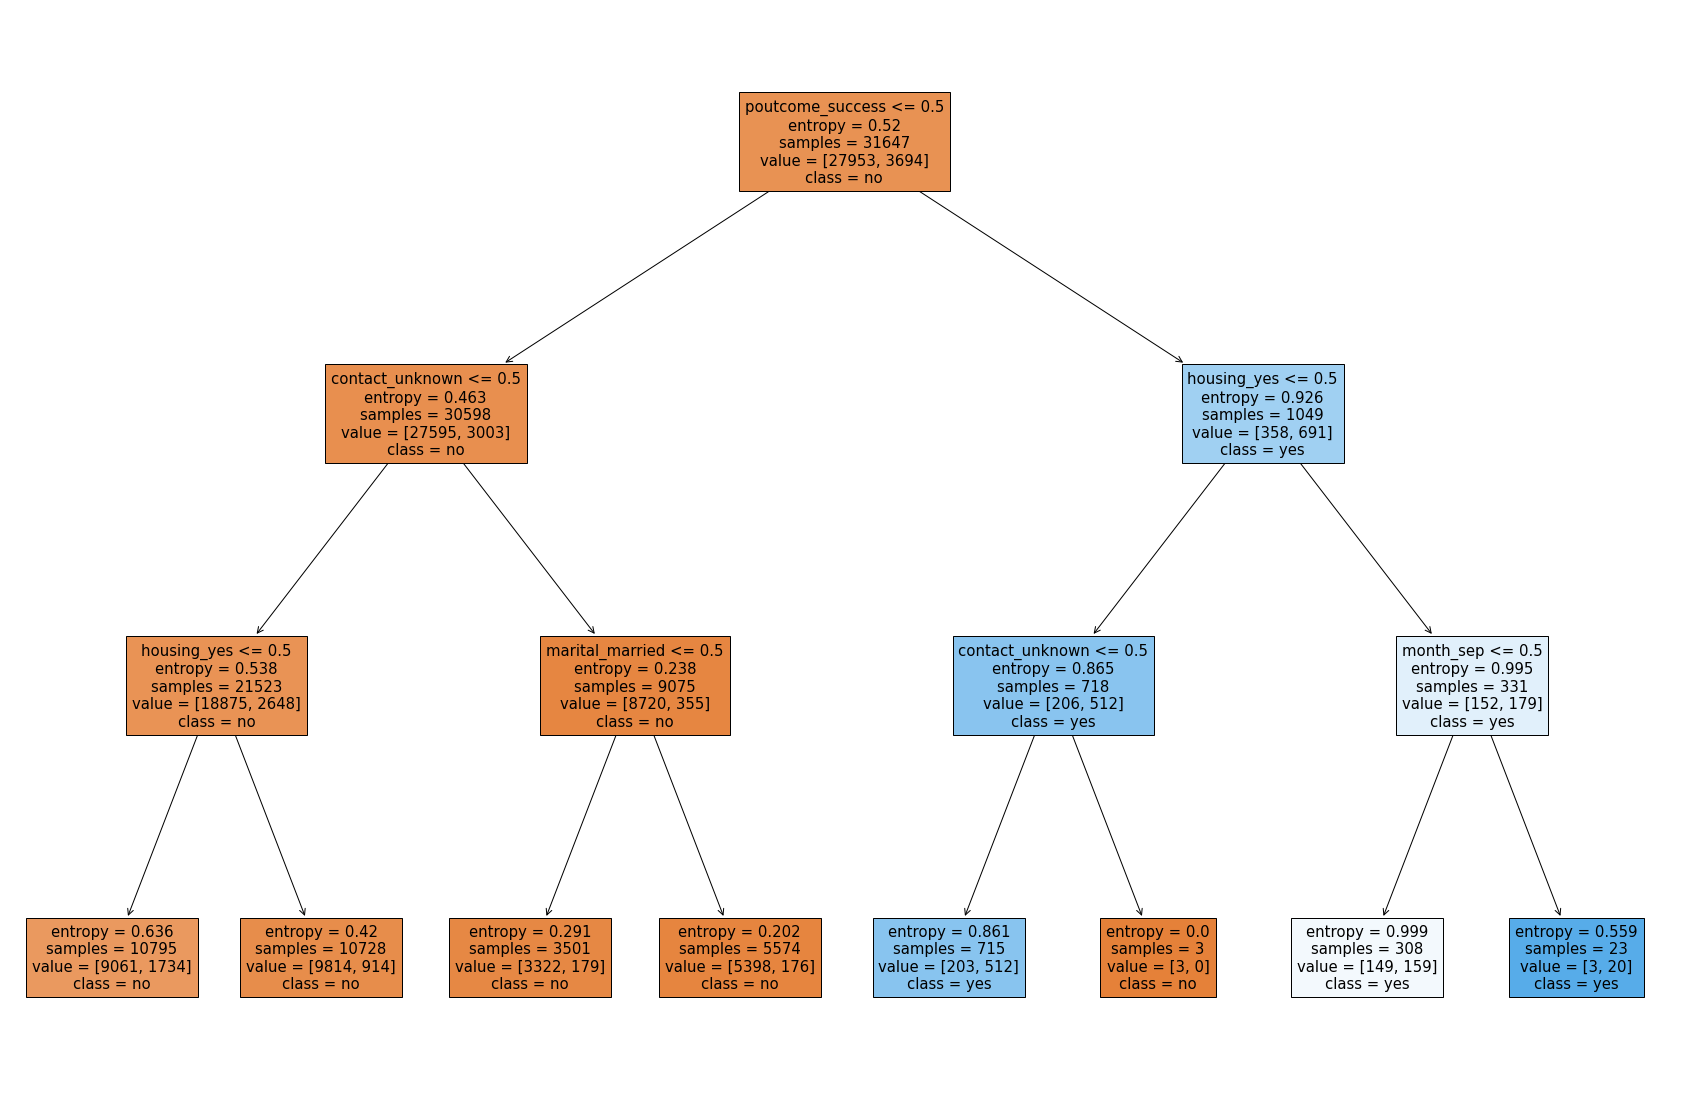

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, 
               feature_names=list(predictors_train.columns),  
               class_names=['no','yes'],
               filled=True)

In [ ]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(predictors_train.columns)))

|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- housing_yes <= 0.50
|   |   |   |--- class: no
|   |   |--- housing_yes >  0.50
|   |   |   |--- class: no
|   |--- contact_unknown >  0.50
|   |   |--- marital_married <= 0.50
|   |   |   |--- class: no
|   |   |--- marital_married >  0.50
|   |   |   |--- class: no
|--- poutcome_success >  0.50
|   |--- housing_yes <= 0.50
|   |   |--- contact_unknown <= 0.50
|   |   |   |--- class: yes
|   |   |--- contact_unknown >  0.50
|   |   |   |--- class: no
|   |--- housing_yes >  0.50
|   |   |--- month_sep <= 0.50
|   |   |   |--- class: yes
|   |   |--- month_sep >  0.50
|   |   |   |--- class: yes



In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model.predict(predictors_test)

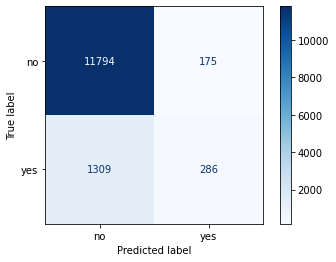

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11969
         yes       0.62      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



Q4. Assume the following costs/benefits: 
*   Cost of marketing to a customer: \$30 per customer receiving marketing.
*   Average Bank income for a purchase: \$200 per customer that purchases term deposit.
*   Opportunity cost of person not marketed but who would have been a purchaser: \$40<br>

Based on the above costs / benefits, what is the total net benefit / cost of the decision tree model on testing data? (3 points) <br>
<br>
-$8,990

Q5. Based on the calculated net benefit/cost, do you think this decision tree model should be used for marketing campaign? why? (2 point)<br>
No because it would result in a negative cost benefit analysis. This results in the business taking a loss , not a profitable marketing campaign


## 5.Naive Bayes training and testing. (16 points)

In [ ]:
# Build a Naive Bayes model on training data with default setting (3 points)
model = MultinomialNB()
model.fit(predictors_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model.predict(predictors_test)
prediction_on_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

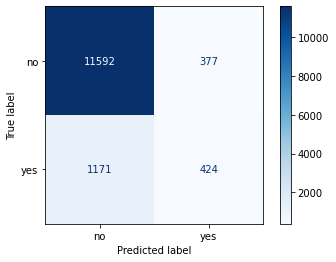

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94     11969
         yes       0.53      0.27      0.35      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.62      0.65     13564
weighted avg       0.86      0.89      0.87     13564



Q6. Assume the following costs/benefits: 
*   Cost of marketing to a customer: \$30 per customer receiving marketing.
*   Average Bank income for a purchase: \$200 per customer that purchases term deposit.
*   Opportunity cost of person not marketed but who would have been a purchaser: \$40<br>

Based on the above costs / benefits, what is the total net benefit / cost of the Naive Bayes model on testing data? (3 point)<br>
<br>
+$13,930

Q7. Based on the calculated net benefit/cost, which model (Decision Tree or Naive Bayes) should be adopted for marketing campaign? why? (2 point)<br>
The Naive Bayes model should be adopted for the marketing campaign. This is because it results in $13,930 profitability. The Decision Tree is not profitable.


Q8. Compare the performances (accuracy, precision, recall, and F-measure) of Decision Tree and Naive Bayes model, and answer the following questions <br>
8.1. Which model has better overall performance on testing data? (1 point)<br>
They both have the same accuracy, 0.89
<br>
8.2. Which model has better performance on the "yes" class? (1 point)<br>
The Naive Bayes has a better f measure for the yes class. So it is better performance overall on the yes class
<br>
8.3. Which model has better performance on the "no" class? (1 point)<br>
They both have the same f measure score of 0.94 on the no class. Therefore, they are equally as good for the no class
<br>
8.4. Which model can identify more customers purchasing term deposit? (1 point)<br>
The Naive Bayes model can identify more customers purchasing term deposits (higher recall value)
<br>
8.5. Interpret the precision value on the "yes" class for both models (1 point)<br>
The Decision Tree has a higher precision value. This means that it has a higher confidence that when it predicts a customer is going to buy a term deposit it is more likely to be true in comparison to the Naive Bayes model.
<br>


***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_homework2.ipynb file***
2.   ***Upload the IS470_homework2.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_homework2.ipynb

[NbConvertApp] Converting notebook IS470_homework2.ipynb to html
[NbConvertApp] Writing 666906 bytes to IS470_homework2.html
